# Portfolio 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
pd.set_option('display.max_columns', 400)
joined = strava.join(cheetah, how='inner')   
joined.drop('average_heartrate', axis=1, inplace=True)
joined.drop('average_temp', axis=1, inplace=True)
joined.drop('elapsed_time', axis=1, inplace=True)
joined.drop('moving_time', axis=1, inplace=True)
joined.drop('average_watts', axis=1, inplace=True)
joined.drop('distance', axis=1, inplace=True)
joined_watts = joined[joined['device_watts']==True]
joined_watts.head()

,device_watts,elevation_gain,kudos,workout_type,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,aBikeStress,aVI,aPower Efficiency Factor,aBikeStress per hour,Aerobic Decoupling,Power Index,Activities,To Exhaustion,Elapsed Time,Duration,Time Moving,Time Carrying (Est),Elevation Gain Carrying (Est),Distance,Climb Rating,Athlete Weight,Athlete Bodyfat,Athlete Bones,Athlete Muscles,Athlete Lean Weight,Athlete Bodyfat Percent,Elevation Gain,Elevation Loss,Work,Average Speed,Average Power,Average SmO2,Average tHb,Average aPower,Nonzero Average Power,Average Heart Rate,Average Core Temperature,Heartbeats,HrPw Ratio,Workbeat stress,Watts:RPE Ratio,Power Percent of Max,HrNp Ratio,Average Cadence,Average Temp,Max Power,Max SmO2,Max tHb,Min SmO2,Min tHb,Max Heartrate,Min Heartrate,Max Core Temperature,Max Speed,Max Cadence,Max Temp,Min Temp,95% Heartrate,VAM,Effect of Altitude,Gradient,Average Power Variance,Max Power Variance,Average Left Torque Effectiveness,Average Right Torque Effectiveness,Average Left Pedal Smoothness,Average Right Pedal Smoothness,Average Left Pedal Center Offset,Average Right Pedal Center Offset,Average Left Power Phase Start,Average Right Power Phase Start,Average Left Power Phase End,Average Right Power Phase End,Average Left Peak Power Phase Start,Average Right Peak Power Phase Start,Average Left Peak Power Phase End,Average Right Peak Power Phase End,Average Left Power Phase Length,Average Right Power Phase Length,Average Left Peak Power Phase Length,Average Right Peak Power Phase Length,Calories (HR),Checksum,Aerobic TISS,Anaerobic TISS,Critical Power,xPower,Relative Intensity,BikeScore,Skiba VI,TISS Aerobicity,Response Index,IsoPower,BikeIntensity,BikeStress,VI,Efficiency Factor,BikeStress per hour,Exhaustion Best R,Daniels Points,Daniels EqP,LNP,RTP,xPace,IWF,GOVSS,H1 Time in Zone,H2 Time in Zone,H3 Time in Zone,H4 Time in Zone,H5 Time in Zone,H6 Time in Zone,H7 Time in Zone,H8 Time in Zone,H9 Time in Zone,H10 Time in Zone,H1 Percent in Zone,H2 Percent in Zone,H3 Percent in Zone,H4 Percent in Zone,H5 Percent in Zone,H6 Percent in Zone,H7 Percent in Zone,H8 Percent in Zone,H9 Percent in Zone,H10 Percent in Zone,Left/Right Balance,P1 Time in Pace Zone,P2 Time in Pace Zone,P3 Time in Pace Zone,P4 Time in Pace Zone,P5 Time in Pace Zone,P6 Time in Pace Zone,P7 Time in Pace Zone,P8 Time in Pace Zone,P9 Time in Pace Zone,P10 Time in Pace Zone,P1 Percent in Pace Zone,P2 Percent in Pace Zone,P3 Percent in Pace Zone,P4 Percent in Pace Zone,P5 Percent in Pace Zone,P6 Percent in Pace Zone,P7 Percent in Pace Zone,P8 Percent in Pace Zone,P9 Percent in Pace Zone,P10 Percent in Pace Zone,10 sec Peak Pace,15 sec Peak Pace,20 sec Peak Pace,30 sec Peak Pace,1 min Peak Pace,2 min Peak Pace,3 min Peak Pace,5 min Peak Pace,8 min Peak Pace,10 min Peak Pace,20 min Peak Pace,30 min Peak Pace,60 min Peak Pace,90 min Peak Pace,10 sec Peak Pace Swim,15 sec Peak Pace Swim,20 sec Peak Pace Swim,30 sec Peak Pace Swim,1 min Peak Pace Swim,2 min Peak Pace Swim,3 min Peak Pace Swim,5 min Peak Pace Swim,8 min Peak Pace Swim,10 min Peak Pace Swim,20 min Peak Pace Swim,30 min Peak Pace Swim,60 min Peak Pace Swim,90 min Peak Pace Swim,Best 50m,Best 100m,Best 200m,Best 400m,Best 500m,Best 800m,Best 1000m,Best 1500m,Best 2000m,Best 3000m,Best 4000m,Best 5000m,Best 10km,Best 15km,Best 20km,Best Half Marathon,Best 30km,Best 40km,Best Marathon,1 min Peak Pace HR,5 min Peak Pace HR,10 min Peak Pace HR,20 min Peak Pace HR,30 min Peak Pace HR,60 min Peak Pace HR,MMP Percentage,Power Zone,Fatigue Index,Pacing Index,1 sec Peak Power,5 sec Peak Power,10 sec Peak Power,15 sec Peak Power,20 sec Peak Power,30 sec Peak Power,1 min Peak Power,2 min Peak Power,3 min Peak Power,5 min Peak Power,8 min Peak Power,10 min Peak Power,20 min Peak Power,30 min Peak Power,60 min Peak Power,90 min Peak Power,1 min Peak Power HR,5 min Peak Power HR,10 min Peak Power HR,20 min Peak Power HR,30 min Peak Power HR

In [5]:
print(joined_watts.shape)

(205, 366)


Skewness of Distance is 219.76257663130446


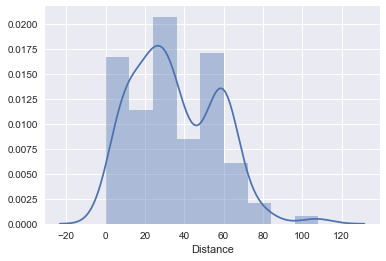

In [24]:
#joined_watts['distance'].hist(histtype ='bar', bins = 50)
sns.distplot(joined_watts['Distance'])
skewness_dist = 3*(joined_watts['Distance'].mean() -joined_watts['Distance'].median())*joined_watts['Distance'].std()
print("Skewness of Distance is", skewness_dist)

### Analysing Distance

Distance seems to be not Normally distributed, that means that distance of the bike ride is not random, and it makes sense, because bicyclists do not ride random distances, their distance covered is predetermined by number of factors, like, in case of Ride type, distance between places bicyclist moves between is set, like distance between home and work. In a Race case, distance is also constant and reflects the length of the race track that bicyclist need to complete in order to finish the race. 

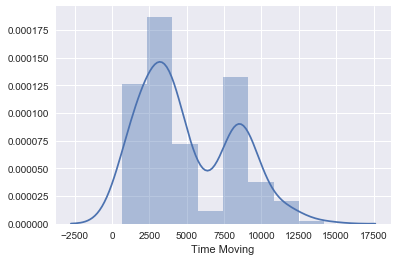

In [25]:
sns.distplot(joined_watts['Time Moving'])

### Analysing Time Moving

Time moving seems to correlate with distance, which makes sense, because the longer you ride, the more distance you will cover.

Skewness of Average Speed is 8.52706056138223


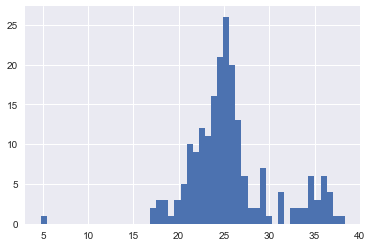

In [7]:
joined_watts['Average Speed'].hist(histtype = 'bar', bins = 50)
skewness_speed = 3*(joined_watts['Average Speed'].mean() -joined_watts['Average Speed'].median())*joined_watts['Average Speed'].std()
print("Skewness of Average Speed is", skewness_speed)

In [27]:
skewness_speed = 3*(joined_watts['Average Speed'].mean() -joined_watts['Average Speed'].median())*joined_watts['Average Speed'].std()
print("Mean is: ", joined_watts['Average Speed'].mean())
print("Skewness is: ", skewness_speed)

Mean is:  25.707538048780485
Skewness is:  8.52706056138223


25.707538048780485
22.41632666481969


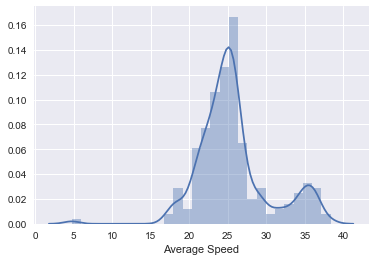

In [28]:
print(joined_watts['Average Speed'].mean())
print(joined_watts['Average Speed'].var())
sns.distplot(joined_watts['Average Speed'])

### Analysing Average Speed

Average speed seems to be approximately Normally distributed, with mean of 25.7 km/h. Smaller peak on the right side of distribution is due to values of Race type of workout, and it makes sense because during the race average speed is expected to be higher than during the leasure riding. 

Mean is:  165.55154634146342
Skewness is : 342.45498269338424


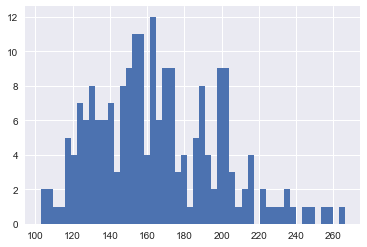

In [31]:
joined_watts['Average Power'].hist(histtype = 'bar', bins = 50)
skewness_power = 3*(joined_watts['Average Power'].mean() -joined_watts['Average Power'].median())*joined_watts['Average Power'].std()
print("Mean is: ", joined_watts['Average Power'].mean())
print("Skewness is :", skewness_power)

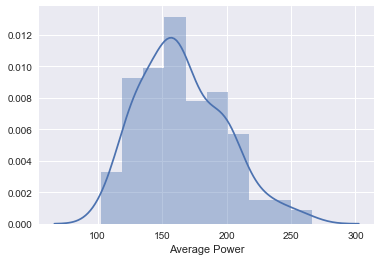

In [29]:
sns.distplot(joined_watts['Average Power'])

### Analysing Average Power

Average power seems to be approximately Normally distributed with mean of 165.55 Watts. 

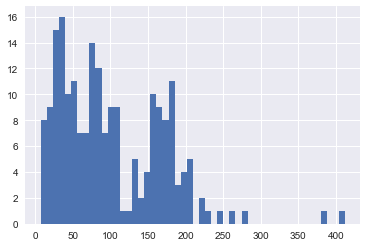

In [10]:
joined_watts['TSS'].hist(histtype = 'bar', bins = 50)

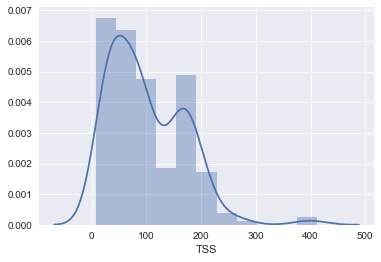

In [30]:
sns.distplot(joined_watts['TSS'])

### Analysing TSS

TSS seems to correlate with Distance and Average Speed.

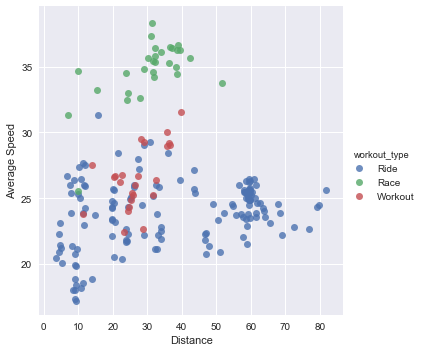

In [11]:
dist_column = joined_watts['Distance']
speed_column = joined_watts['Average Speed']
workout_type_column = joined_watts['workout_type']
dist = pd.DataFrame(dist_column)
speed = pd.DataFrame(speed_column)
workout_type = pd.DataFrame(workout_type_column)
dist_and_speed = dist.join(speed, how='inner').join(workout_type, how='inner')
dist_and_speed = dist_and_speed[(dist_and_speed['Distance'] < 100) & (dist_and_speed['Distance'] > 1)]
sns.lmplot(x='Distance', y ='Average Speed', fit_reg = False, hue = 'workout_type', data = dist_and_speed)

In [12]:
dist_and_speed.corr()

,Distance,Average Speed
Distance,1.000000,0.056706
Average Speed,0.056706,1.000000


Very weak correlation between distance and speed in total. Might be different if we divide them by workout type. 

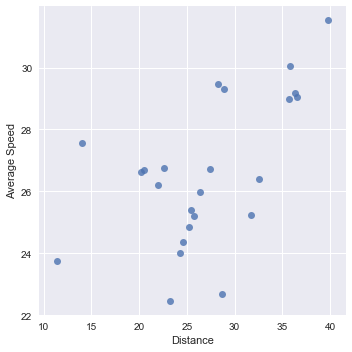

In [13]:
dist_and_speed_workout = dist_and_speed[dist_and_speed['workout_type'] == 'Workout']
sns.lmplot(x='Distance', y='Average Speed', fit_reg = False, data = dist_and_speed_workout)

In [14]:
dist_and_speed_workout.corr()

,Distance,Average Speed
Distance,1.000000,0.577991
Average Speed,0.577991,1.000000


Weak correlation between distance and Average Speed in the Workout type, but stronger than in general estimation

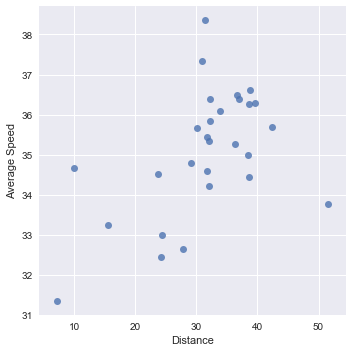

In [15]:
dist_and_speed_race = dist_and_speed[(dist_and_speed['workout_type'] == 'Race') & (dist_and_speed['Average Speed'] > 26)]
sns.lmplot(x='Distance', y='Average Speed', fit_reg = False, data = dist_and_speed_race)

In [16]:
dist_and_speed_race.corr()

,Distance,Average Speed
Distance,1.000000,0.496565
Average Speed,0.496565,1.000000


Weak correlation between Distance and Average Speed in Race type

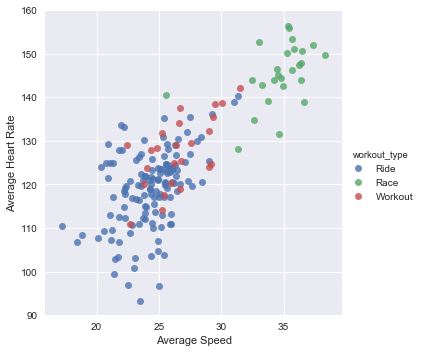

In [17]:
joined_heartvsspeed = joined_watts[(joined_watts['Average Heart Rate'] > 80) & (joined_watts['Average Speed'] > 5)]
sns.lmplot(x='Average Speed', y = 'Average Heart Rate', fit_reg = False, hue = 'workout_type', data = joined_heartvsspeed)


In [19]:
heart_column = joined_heartvsspeed['Average Heart Rate']
speed_column = joined_heartvsspeed['Average Speed']
heart = pd.DataFrame(heart_column)
speed = pd.DataFrame(speed_column)
heart_and_speed = heart.join(speed, how='inner')
heart_and_speed.corr()
#[['distance'],['Time Moving'],['Average Speed'],['Average Heart Rate'],['Average aPower'],['NP'],['TSS'],['elevation_gain']]

,Average Heart Rate,Average Speed
Average Heart Rate,1.000000,0.789134
Average Speed,0.789134,1.000000


Strong correlation between Average Heart Rate and Average Speed

In [20]:
joined_analysis = joined_watts.iloc[:,[3,27,24,38,39,44,363,365,35,]]
joined_analysis.head()

,workout_type,Distance,Time Moving,Average Speed,Average Power,Average Heart Rate,NP,TSS,Elevation Gain
2018-01-28 06:39:49+11:00,Ride,7.5974,1053,26.0234,153.283,120.539,222.856,20.2257,77.8
2018-01-28 07:01:32+11:00,Race,38.6279,4062,34.4380,186.599,146.541,245.365,94.5787,362.2
2018-02-06 08:06:42+11:00,Ride,24.2805,3945,22.2417,163.264,119.178,253.702,98.3269,355.8
2018-02-07 17:59:05+11:00,Ride,47.0529,8159,20.7841,148.253,124.936,232.644,171.0780,815.4
2018-02-10 06:18:03+11:00,Ride,59.8128,8415,25.6585,143.918,122.678,212.726,147.7970,513.2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


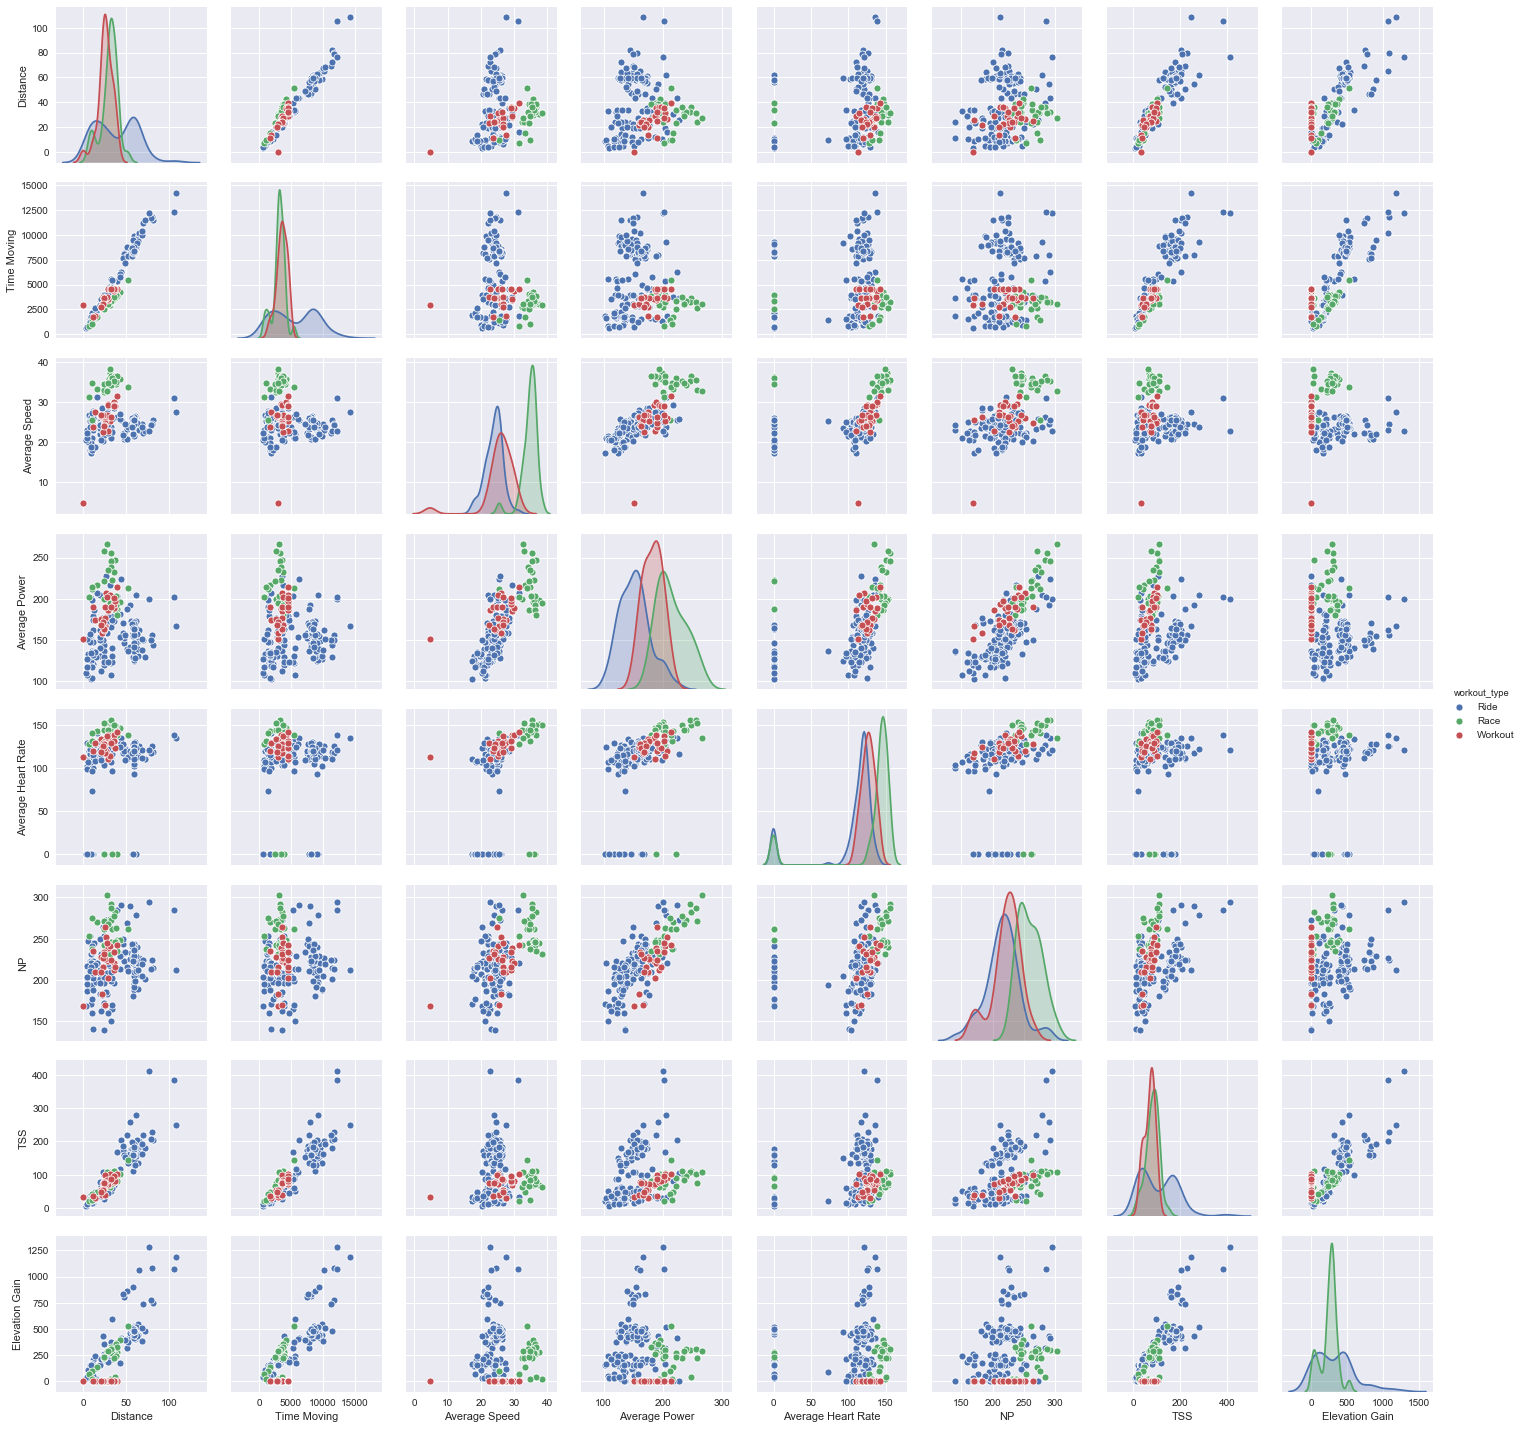

In [21]:
sns.pairplot(joined_analysis,hue='workout_type')

In [22]:
joined_analysis.corr()

,Distance,Time Moving,Average Speed,Average Power,Average Heart Rate,NP,TSS,Elevation Gain
Distance,1.000000,0.971833,0.110486,0.030479,0.146246,0.202864,0.920056,0.804842
Time Moving,0.971833,1.000000,-0.102954,-0.119603,0.084424,0.092725,0.909882,0.828337
Average Speed,0.110486,-0.102954,1.000000,0.738740,0.366373,0.507974,0.037499,-0.078419
Average Power,0.030479,-0.119603,0.738740,1.000000,0.406241,0.761274,0.139968,-0.113476
Average Heart Rate,0.146246,0.084424,0.366373,0.406241,1.000000,0.271764,0.147901,0.037649
NP,0.202864,0.092725,0.507974,0.761274,0.271764,1.000000,0.425102,0.228622
TSS,0.920056,0.909882,0.037499,0.139968,0.147901,0.425102,1.000000,0.830574
Elevation Gain,0.804842,0.828337,-0.078419,-0.113476,0.037649,0.228622,0.830574,1.000000


# Portfolio 2

In this portfolio we will be replicating some of the analysis employed by the article "Data driven prediction models of energy use of appliances in a low-energy house" by Luis M. Candanedo∗, Véronique Feldheim, Dominique Deramaix. 
The aim of this reseach is to build prediction models of energy consumption in British households based on different feautures. 

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from datetime import date
%matplotlib inline


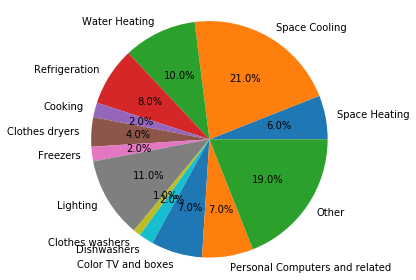

In [14]:
labels = ['Space Heating', 'Space Cooling', 'Water Heating', 'Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers', 'Lighting', 'Clothes washers', 'Dishwashers','Color TV and boxes','Personal Computers and related','Other']
sizes = [6,21,10,8,2,4,2,11,1,2,7,7,19]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

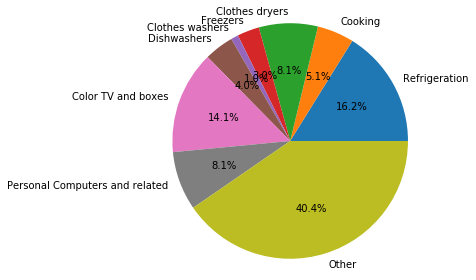

In [15]:
labels_1 = ['Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers', 'Clothes washers', 'Dishwashers','Color TV and boxes','Personal Computers and related','Other']
sizes_1 = [16,5,8,3,1,4,14,8,40]
fig2, ax2 = plt.subplots()
ax2.pie(sizes_1, labels = labels_1, autopct='%1.1f%%')
ax2.axis('equal')  
plt.tight_layout()
plt.show()

Residential electrical energy consumption adapted from Table A4 page 139 of annual energy Outlook projections for 2015. Top chart, percentage of all delivered energy, Bottom chart, after removing Space heating, Space cooling, Lighting and Water Heating contributions. As you can see, temperature regulation in the house is by far the most power consuming component in the household sitting at total. Next biggest contributor is lighting. 

In [16]:
energy_data = pd.read_csv('data\energydata_complete.csv')
pd.set_option('display.max_columns', 30)

In [17]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [18]:
energy_data['datetime'] = pd.to_datetime(energy_data['date'])

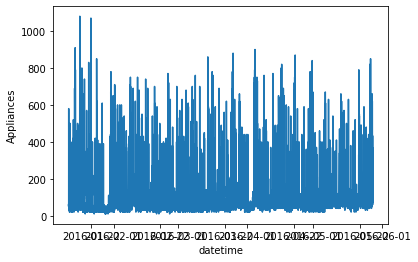

In [19]:
sns.lineplot(x = energy_data['datetime'], y = energy_data['Appliances'])

In [177]:
energy_data_new = energy_data[energy_data['datetime'] < date(2016,1,19)]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


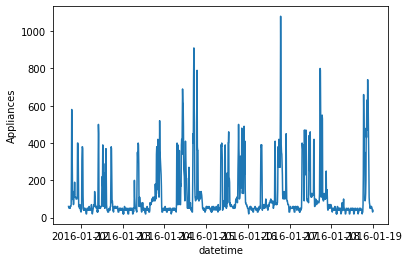

In [178]:
sns.lineplot(x = energy_data_new['datetime'], y = energy_data_new['Appliances'])

In [179]:
energy_data_new['day_name'] = energy_data_new['datetime'].dt.weekday_name

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
energy_data_new['hour'] = energy_data_new['datetime'].dt.hour

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
energy_data_new.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,datetime,day_name,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,Monday,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,Monday,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,Monday,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,Monday,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,Monday,17


In [181]:
energy_data_new.set_index('hour', inplace = True)
energy_data_new['day_name'] = pd.Categorical(energy_data_new['day_name'],
                                        categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                        ordered=True)
energy_data_new

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,datetime,day_name
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,...,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11 17:00:00,Monday
17,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,...,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11 17:10:00,Monday
17,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,...,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11 17:20:00,Monday
17,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,...,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11 17:30:00,Monday
17,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,...,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11 17:40:00,Monday
17,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,...,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2016-01-11 17:50:00,Monday
18,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,...,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2016-01-11 18:00:00,Monday
18,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,...,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2016-01-11 18:10:00,Monday
18,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,...,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2016-01-11 18:20:00,Monday


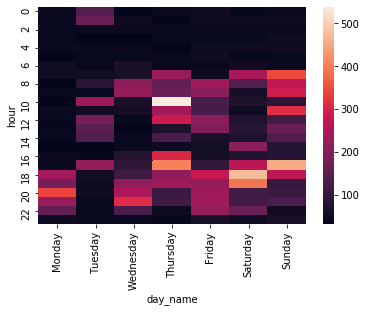

In [188]:

heatmap = pd.pivot_table(data = energy_data_new, index = 'hour', values = 'Appliances', columns = 'day_name')
sns.heatmap(heatmap)

We only have data on Monday starting from 5 pm, but we can see, that energy usage starts to increase at 6 am, a common time people wake up for work or school. Number of appliances run seems to increase in the evening, from 4-5 pm and starts to decrease again closer to midnight.

In [24]:
sns.relplot(x='datetime', y='Appliances', kind = 'line', data = energy_data, aspect)

SyntaxError: positional argument follows keyword argument (<ipython-input-24-342f7342b50a>, line 1)

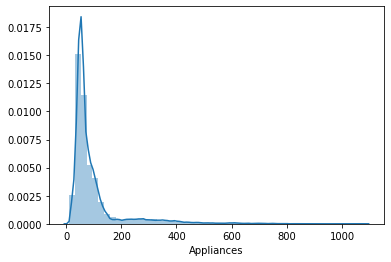

In [26]:
sns.distplot(energy_data['Appliances'])

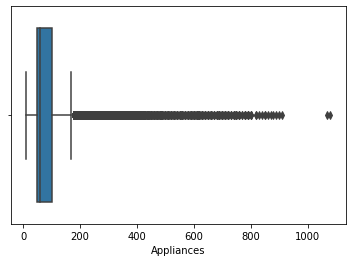

In [27]:
sns.boxplot(energy_data['Appliances'])

As you can see, households have on average between 80 and 120 appliances, 75% of the houshold have less than 200 appliances. 25% of the housholds have more than 200 appliances, with a peak at 380, which might indicate affluent households. 

In [28]:
training_data = pd.read_csv('data/training.csv')

In [29]:
testing_data = pd.read_csv('data/testing.csv')

In [30]:
temp_hum_first = training_data.iloc[:,[1,2,3,4,5,6,7,8]]

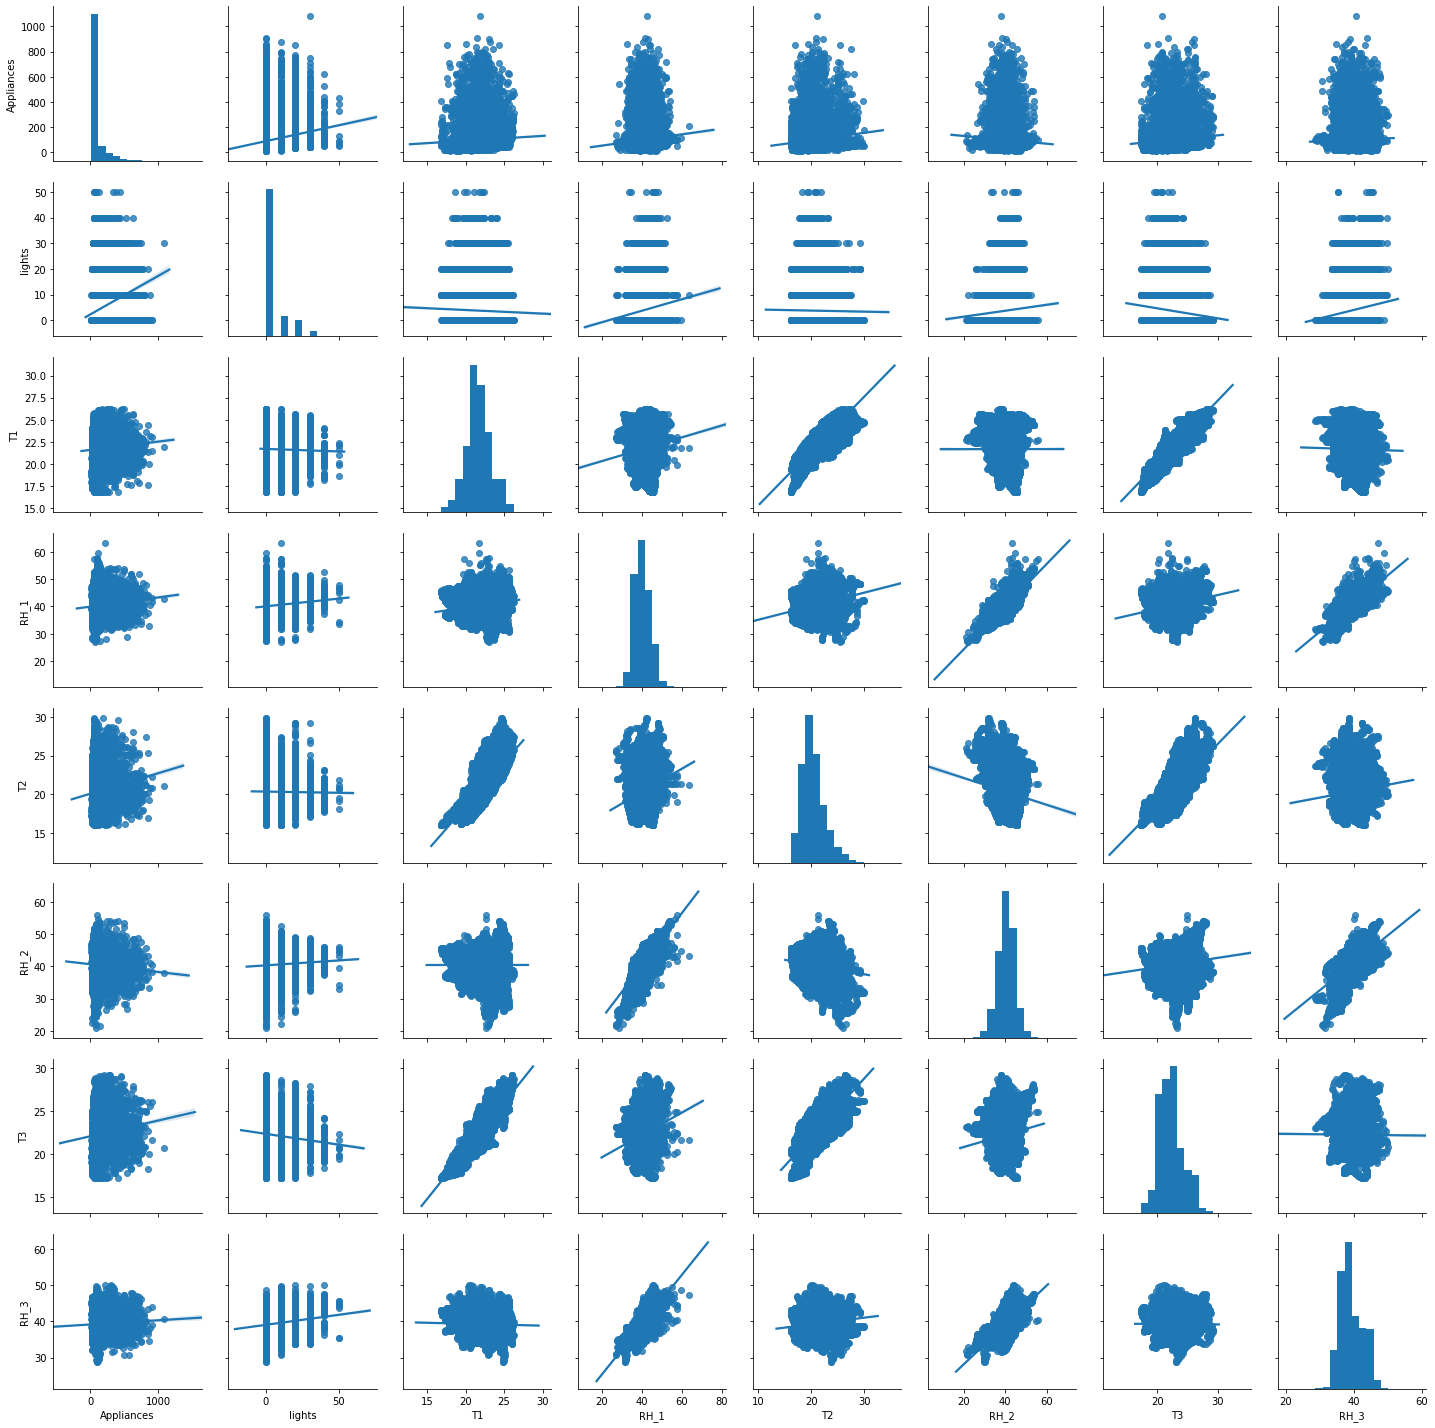

In [31]:
sns.pairplot(temp_hum_first, kind="reg")

First pairplot is used to see relationships between temperatures in kitchens, living rooms and laundry areas and number of appliances and lights

In [32]:
temp_hum_first.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.194689,0.060137,0.087276,0.124719,-0.061108,0.093336,0.036765
lights,0.194689,1.000000,-0.028300,0.112602,-0.011521,0.059335,-0.099009,0.135162
T1,0.060137,-0.028300,1.000000,0.166716,0.837948,0.000574,0.892645,-0.026293
RH_1,0.087276,0.112602,0.166716,1.000000,0.273212,0.798149,0.257264,0.845261
T2,0.124719,-0.011521,0.837948,0.273212,1.000000,-0.160643,0.736325,0.123498
RH_2,-0.061108,0.059335,0.000574,0.798149,-0.160643,1.000000,0.141735,0.680792
T3,0.093336,-0.099009,0.892645,0.257264,0.736325,0.141735,1.000000,-0.007733
RH_3,0.036765,0.135162,-0.026293,0.845261,0.123498,0.680792,-0.007733,1.000000


In [33]:
energy_data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [34]:
x_train = training_data[['Tdewpoint']]
y_train = training_data['T6']
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
x_test = testing_data[['Tdewpoint']]
y_test = testing_data['T6']

In [36]:
predicted = reg.predict(x_test)
print('Mean Square Error:',mean_squared_error(y_test,predicted))
print('Rsquare:', r2_score(y_test,predicted))

Mean Square Error: 15.11242461975454
Rsquare: 0.5870843463621545


In [37]:
xmin = predicted.min()
ymin = reg.coef_[0]*xmin + reg.intercept_
xmax = predicted.max()
ymax = reg.coef_[0]*xmax + reg.intercept_

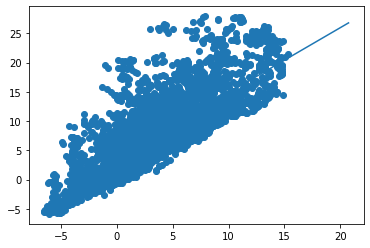

In [38]:
plt.scatter(x_test,y_test)
plt.plot([xmin, xmax], [ymin, ymax])

In [39]:
feature_cols = training_data.iloc[:,2:28]
app_train = training_data['Appliances']

In [40]:
x_train_rfe = feature_cols
y_train_rfe = app_train
estimator = LinearRegression()
selector = RFE(estimator, 5)
selector.fit(x_train_rfe,y_train_rfe)
sup = selector.get_support()

In [41]:
feature_cols_test = testing_data.iloc[:,2:28]
x_test_rfe = feature_cols_test
y_test_rfe = testing_data['Appliances']
predicted = selector.predict(x_test_rfe)
predicted

array([105.36604642, 101.81618905, 102.28276414, ..., 179.51858266,
       160.00047532, 148.24741197])

# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

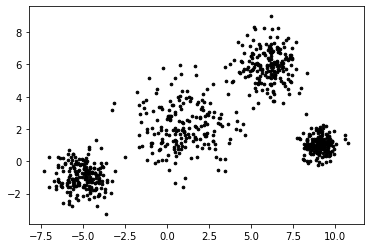

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [3]:
k=4
c=data.shape[1]
n=data.shape[0]
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)
np.random.seed(6)
centres = np.random.randn(k,c)*std + mean

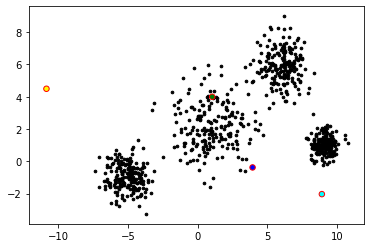

In [4]:
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.scatter(centres[:,0], centres[:,1], s=30, color = ['green','blue','yellow','cyan'], edgecolor = 'red')

## 2. Visualise the clustering results in each iteration

KMeans is an algorithym for clustering data using centroids. It only works well if we know approximate number of clusters the data makes. First centroids are randomly placed in data, then each datapoint is assigned to a closest centroid, then the new centroids are chosen be taking a mean distance between datapoints and the old centroids, and algorithm executs again. After a certain number of iterrations, all data is clustered around centroids and each new iterration doesn't move them much. 

In [ ]:
data

In [5]:
distance=np.zeros((n,k))
for i in range(k):
    distance[:,i]=np.linalg.norm(data-centres[i],axis=1)
c = np.zeros((n,1))
for i in range(n):
   c = np.argmin(distance, axis = 1)

green = list()
blue = list()
yellow = list()
cyan = list()

for i in range(n):
    if c[i] == 0:
        green.append(data[i])
    if c[i] == 1:
        blue.append(data[i])
    if c[i] == 2:
        yellow.append(data[i])
    if c[i] == 3:
        cyan.append(data[i])
        
centres[0] = np.mean(green,axis=0)
centres[1] = np.mean(blue,axis=0)
centres[2] = np.mean(yellow,axis=0)
centres[3] = np.mean(cyan,axis=0)

green1 = np.asarray(green)
blue1 = np.asarray(blue)
yellow1 = np.asarray(yellow)
cyan1 = np.asarray(cyan)



In [6]:
c

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

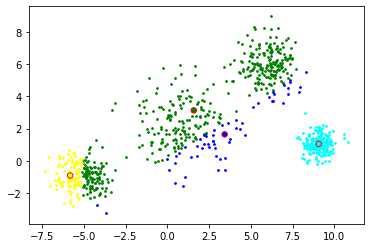

In [7]:
plt.scatter(green1[:,0], green1[:,1], s=3, c='green')
plt.scatter(blue1[:,0], blue1[:,1], s=3, c='blue')
plt.scatter(yellow1[:,0], yellow1[:,1], s=3, c='yellow')
plt.scatter(cyan1[:,0], cyan1[:,1], s=3, c='cyan')
plt.scatter(centres[:,0], centres[:,1], s=30, color = ['green','blue','yellow','cyan'], edgecolor = 'red')

In [8]:
distance=np.zeros((n,k))
for i in range(k):
    distance[:,i]=np.linalg.norm(data-centres[i],axis=1)
c = np.zeros((n,1))
for i in range(n):
   c = np.argmin(distance, axis = 1)

green = list()
blue = list()
yellow = list()
cyan = list()

for i in range(n):
    if c[i] == 0:
        green.append(data[i])
    if c[i] == 1:
        blue.append(data[i])
    if c[i] == 2:
        yellow.append(data[i])
    if c[i] == 3:
        cyan.append(data[i])
        
centres[0] = np.mean(green,axis=0)
centres[1] = np.mean(blue,axis=0)
centres[2] = np.mean(yellow,axis=0)
centres[3] = np.mean(cyan,axis=0)

green1 = np.asarray(green)
blue1 = np.asarray(blue)
yellow1 = np.asarray(yellow)
cyan1 = np.asarray(cyan)



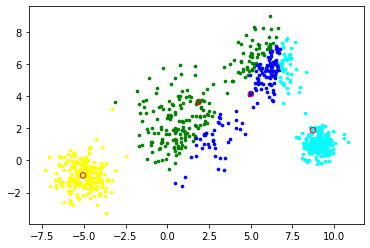

In [9]:
plt.scatter(green1[:,0], green1[:,1], s=7, c='green')
plt.scatter(blue1[:,0], blue1[:,1], s=7, c='blue')
plt.scatter(yellow1[:,0], yellow1[:,1], s=7, c='yellow')
plt.scatter(cyan1[:,0], cyan1[:,1], s=7, c='cyan')
plt.scatter(centres[:,0], centres[:,1], s=30, color = ['green','blue','yellow','cyan'], edgecolor = 'red')

In [10]:
distance=np.zeros((n,k))
for i in range(k):
    distance[:,i]=np.linalg.norm(data-centres[i],axis=1)
c = np.zeros((n,1))
for i in range(n):
   c = np.argmin(distance, axis = 1)

green = list()
blue = list()
yellow = list()
cyan = list()

for i in range(n):
    if c[i] == 0:
        green.append(data[i])
    if c[i] == 1:
        blue.append(data[i])
    if c[i] == 2:
        yellow.append(data[i])
    if c[i] == 3:
        cyan.append(data[i])
        
centres[0] = np.mean(green,axis=0)
centres[1] = np.mean(blue,axis=0)
centres[2] = np.mean(yellow,axis=0)
centres[3] = np.mean(cyan,axis=0)

green1 = np.asarray(green)
blue1 = np.asarray(blue)
yellow1 = np.asarray(yellow)
cyan1 = np.asarray(cyan)



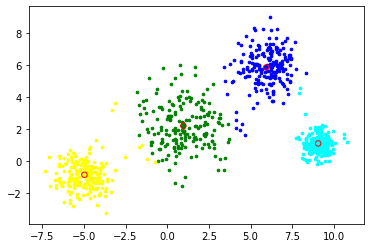

In [11]:
plt.scatter(green1[:,0], green1[:,1], s=7, c='green')
plt.scatter(blue1[:,0], blue1[:,1], s=7, c='blue')
plt.scatter(yellow1[:,0], yellow1[:,1], s=7, c='yellow')
plt.scatter(cyan1[:,0], cyan1[:,1], s=7, c='cyan')
plt.scatter(centres[:,0], centres[:,1], s=30, color = ['green','blue','yellow','cyan'], edgecolor = 'red')

In [12]:
distance=np.zeros((n,k))
for i in range(k):
    distance[:,i]=np.linalg.norm(data-centres[i],axis=1)
c = np.zeros((n,1))
for i in range(n):
   c = np.argmin(distance, axis = 1)

green = list()
blue = list()
yellow = list()
cyan = list()

for i in range(n):
    if c[i] == 0:
        green.append(data[i])
    if c[i] == 1:
        blue.append(data[i])
    if c[i] == 2:
        yellow.append(data[i])
    if c[i] == 3:
        cyan.append(data[i])
        
centres[0] = np.mean(green,axis=0)
centres[1] = np.mean(blue,axis=0)
centres[2] = np.mean(yellow,axis=0)
centres[3] = np.mean(cyan,axis=0)

green1 = np.asarray(green)
blue1 = np.asarray(blue)
yellow1 = np.asarray(yellow)
cyan1 = np.asarray(cyan)



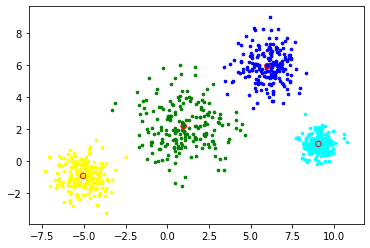

In [13]:
plt.scatter(green1[:,0], green1[:,1], s=7, c='green')
plt.scatter(blue1[:,0], blue1[:,1], s=7, c='blue')
plt.scatter(yellow1[:,0], yellow1[:,1], s=7, c='yellow')
plt.scatter(cyan1[:,0], cyan1[:,1], s=7, c='cyan')
plt.scatter(centres[:,0], centres[:,1], s=30, color = ['green','blue','yellow','cyan'], edgecolor = 'red')